<a href="https://colab.research.google.com/github/Vidya-ak-14/Alzheimerdisease/blob/main/Without_smote_and_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('/content/oasis_longitudinal (2).csv')
print(df.head())
df.shape

  Subject ID         MRI ID        Group  Visit  MR Delay M_F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  


(373, 15)

<ipython-input-2-a9e0876bac66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


             Visit  MR Delay       Age      EDUC       SES      MMSE  \
Visit     1.000000  0.920009  0.183213  0.024615 -0.051622 -0.029078   
MR Delay  0.920009  1.000000  0.205357  0.051630 -0.030813  0.065844   
Age       0.183213  0.205357  1.000000 -0.027886 -0.046857  0.055612   
EDUC      0.024615  0.051630 -0.027886  1.000000 -0.722647  0.194884   
SES      -0.051622 -0.030813 -0.046857 -0.722647  1.000000 -0.149219   
MMSE     -0.029078  0.065844  0.055612  0.194884 -0.149219  1.000000   
CDR       0.002325 -0.062915 -0.026257 -0.153121  0.076160 -0.686519   
eTIV      0.117428  0.119624  0.042348  0.257015 -0.261575 -0.032084   
nWBV     -0.126682 -0.105586 -0.518359 -0.012200  0.090095  0.341912   
ASF      -0.120399 -0.123545 -0.035067 -0.241752  0.255576  0.040052   

               CDR      eTIV      nWBV       ASF  
Visit     0.002325  0.117428 -0.126682 -0.120399  
MR Delay -0.062915  0.119624 -0.105586 -0.123545  
Age      -0.026257  0.042348 -0.518359 -0.035067  
EDU

<Axes: >

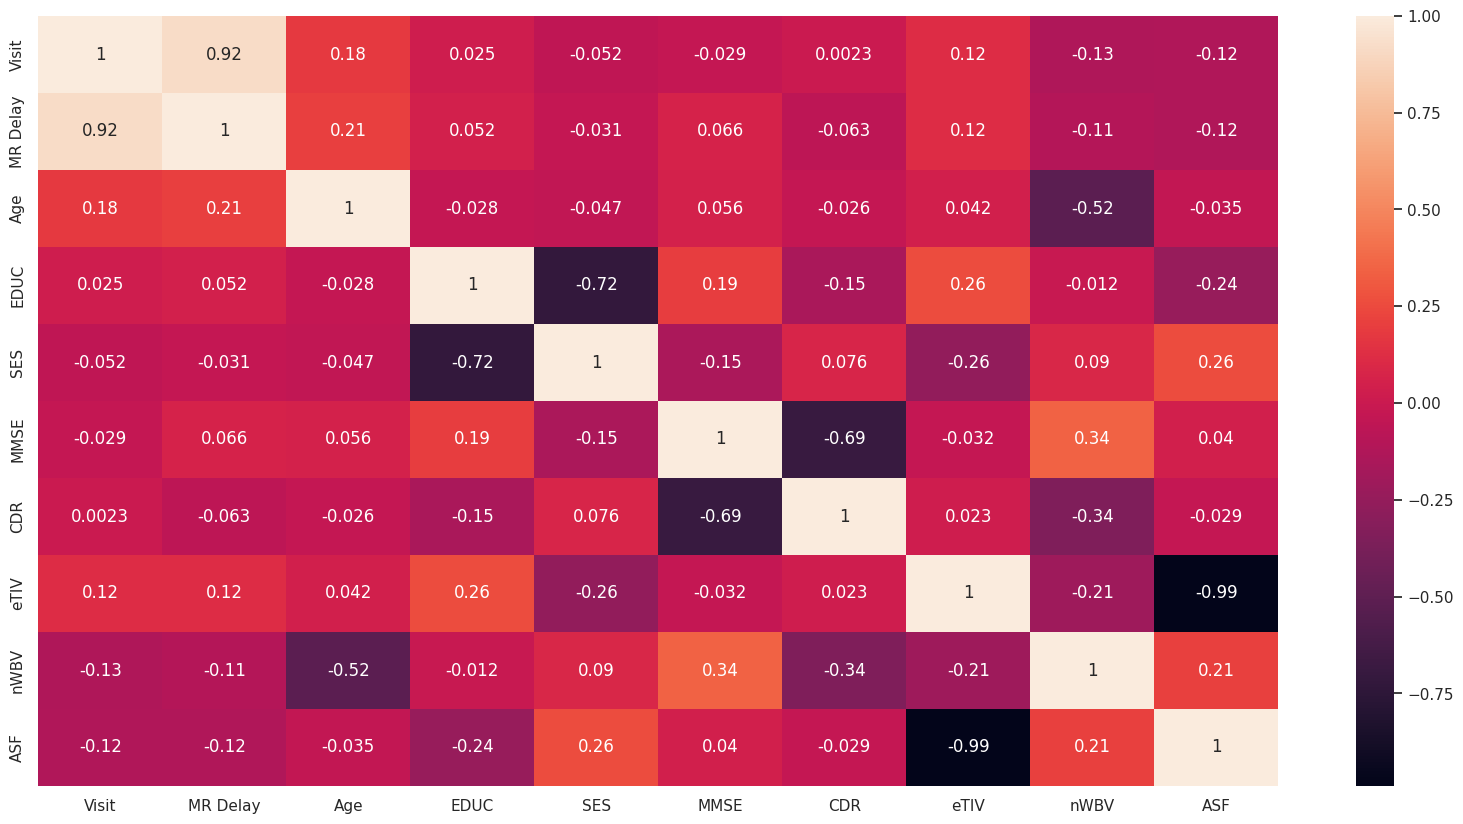

In [ ]:
cor_matrix = df.corr()
plt.figure(figsize=(20,10))
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True)

In [ ]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M_F'] = df['M_F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID','MR Delay','Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [ ]:
# Check missing values by each column
pd.isnull(df).sum()
# The column, SES has 8 missing values

Subject ID    0
Group         0
M_F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
M_F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

In [ ]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [ ]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [ ]:
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:

# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M_F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split( X, Y, random_state=0)
#X_trainval, Y_trainval = oversample.fit_resample(X,Y)
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M_F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
 # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,f1_score,precision_score

In [ ]:
acc = [] # list to store all performance metric

In [ ]:
estimator = []

In [ ]:
# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)
#estimator.append(('LR',LogisticRegression(C=best_parameters)))

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (w/ dropna)'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8157894736842105
Test recall with the best C parameter is 0.75
Test F1_score with the best C parameter is 0.8108108108108107
Test Precision with the best C parameter is 0.8823529411764706
Test AUC with the best C parameter is 0.8194444444444443


SVM

In [ ]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter


# rebuild a model with best parameters to get score
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)
#estimator.append(('SVM',SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k)))
test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)
m = 'SVM'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7687747035573123
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8157894736842105
Test recall with the best C parameter is 0.75
Test F1_score with the best C parameter is 0.8108108108108107
Test Precision with the best C parameter is 0.8823529411764706
Test AUC with the best C parameter is 0.8194444444444443


Decision Tree

In [ ]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('DT',DecisionTreeClassifier(max_depth=best_parameter)))

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7770750988142293
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8157894736842105
Test recall with the best C parameter is 0.65
Test F1_score with the best C parameter is 0.787878787878788
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.825


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U32')

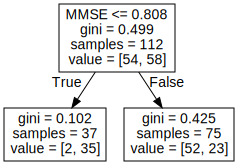

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data)
graph

RF

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

#estimator.append(('RT',RandomForestClassifier(n_estimators=M, max_features=d, max_depth=m, random_state=0)))
PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])



Best accuracy on validation set is: 0.8035573122529645
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.868421052631579
Test recall with the best C parameter is 0.8
Test F1_score with the best C parameter is 0.8648648648648648
Test Precision with the best C parameter is 0.9411764705882353
Test AUC with the best C parameter is 0.8722222222222222


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.03272614516882067'],
       ['Age', '0.08867628368851577'],
       ['EDUC', '0.06492292805740985'],
       ['SES', '0.06499245425708992'],
       ['MMSE', '0.4182778795501145'],
       ['eTIV', '0.07921316937549303'],
       ['nWBV', '0.15813355490217915'],
       ['ASF', '0.09305758500037715']], dtype='<U32')

Adaboost

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('AB',AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)))

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)
m = 'AdaBoost'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7770750988142293
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.868421052631579
Test recall with the best C parameter is 0.65
Test F1_score with the best C parameter is 0.787878787878788
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.825


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.21428571428571427'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.14285714285714285'],
       ['ASF', '0.0']], dtype='<U32')

LightGBM

In [ ]:
import lightgbm

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        LGBMModel = lightgbm.LGBMClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(LGBMModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedLGBMModel = lightgbm.LGBMClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval, Y_trainval )

PredictedOutput = SelectedLGBMModel.predict(X_test_scaled)
test_score = SelectedLGBMModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'LightGBM'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

[LightGBM] [Info] Number of positive: 46, number of negative: 43
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.516854 -> initscore=0.067441
[LightGBM] [Info] Start training from score 0.067441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 46, number of negative: 43
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in th

In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.21428571428571427'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.14285714285714285'],
       ['ASF', '0.0']], dtype='<U32')

XGBoost

In [ ]:
import xgboost as xgb

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        XGBRFmodel = xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(XGBRFmodel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedXGBRFModel = xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('XGB',xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0)))


PredictedOutput = SelectedXGBRFModel.predict(X_test_scaled)
test_score = SelectedXGBRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'XGBRFClassifier'
acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7320158102766797
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8421052631578947
Test recall with the best C parameter is 0.7
Test F1_score with the best C parameter is 0.8235294117647058
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.85


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M_F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.21428571428571427'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.14285714285714285'],
       ['ASF', '0.0']], dtype='<U32')

Result

In [ ]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'F1-Score','Precision', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall','F1-Score','Precision' ,'AUC']]

,Model,Accuracy,Recall,F1-Score,Precision,AUC
0,Logistic Regression (w/ dropna),0.815789,0.75,0.810811,0.882353,0.819444
1,SVM,0.815789,0.75,0.810811,0.882353,0.819444
2,Decision Tree,0.815789,0.65,0.787879,1.000000,0.825000
3,Random Forest,0.868421,0.80,0.864865,0.941176,0.872222
4,AdaBoost,0.868421,0.65,0.787879,1.000000,0.825000
5,LightGBM,0.526316,1.00,0.689655,0.526316,0.500000
6,XGBRFClassifier,0.842105,0.70,0.823529,1.000000,0.850000


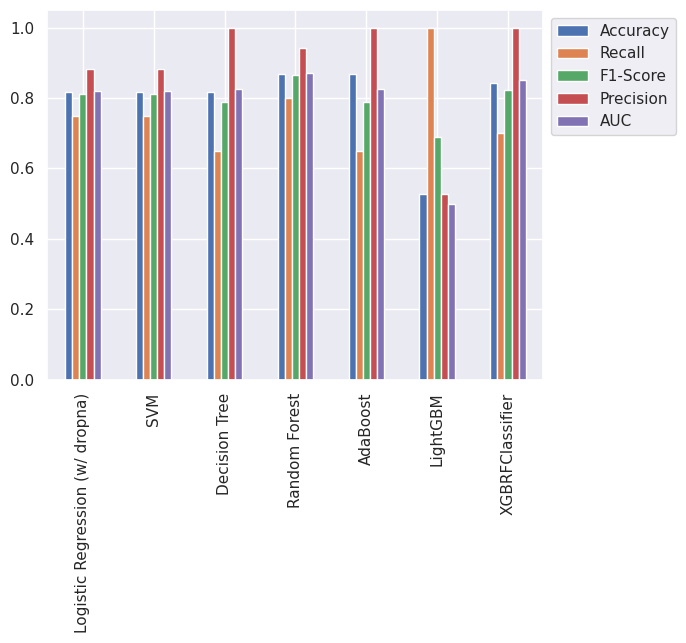

In [ ]:
# results graph
result.plot.bar()
plt.xticks(range(7), result["Model"])
plt.legend(bbox_to_anchor=(1, 1));